In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Average (Mean) ##

In [3]:
# Values
values = make_array(2, 3, 3, 9)

In [4]:
# Find the average
sum(values)/len(values)

4.25

In [5]:
# Find the average using np
np.average(values)

4.25

In [6]:
# Make Table 
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


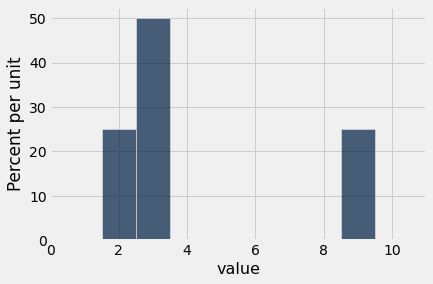

In [7]:
# If two datasets have the same distribution then they have the same mean
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [8]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

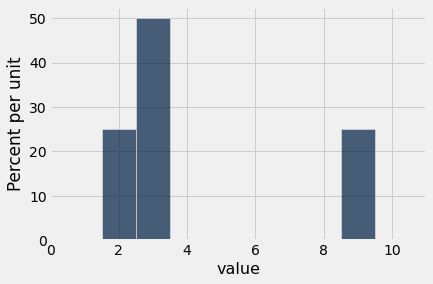

In [9]:
# diplay the distribution
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [10]:
# Compare the averages
np.average(values)

4.25

In [11]:
# Compare the averages
np.average(new_vals)

4.25

## Standard Deviation ##

In [12]:
# Make Table
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [13]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [14]:
# Find deviations from the average
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [15]:
# Sum the deviations
sum(deviations)

0.0

In [17]:
# Square the deviations
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [18]:
# Variance of the data - spread of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [ ]:
# Standard Deviation (SD) is the square root of the variance
# Distance from the mean

sd = variance ** 0.5
sd

In [ ]:
#np.std(array) find SD of values
np.std(values)

## Chebyshev's Bound

In [19]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


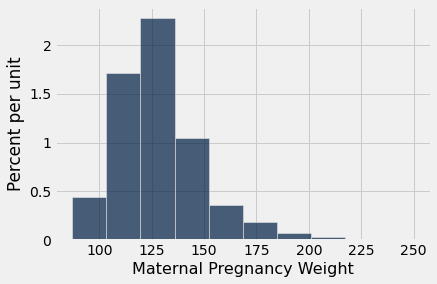

In [32]:
births.hist('Maternal Pregnancy Weight')

In [33]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [34]:
# Find all indivuals within 3 SD of the mean
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [35]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [24]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [25]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [26]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

## Standard Units ##

In [37]:

def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [38]:
# Convert the Maternal Age into Standart Units 
ages = births.column('Maternal Age')

In [39]:
ages_standard_units = standard_units(ages)

In [40]:
# Find mean of ages in standard units and standard deviation from mean
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [41]:
# Make Table of Age in Stand 
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [42]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

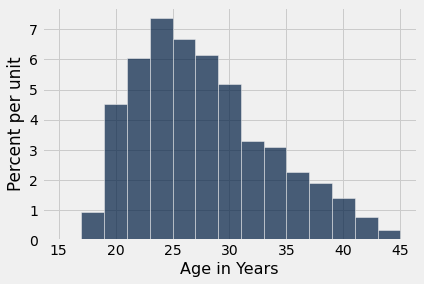

In [43]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

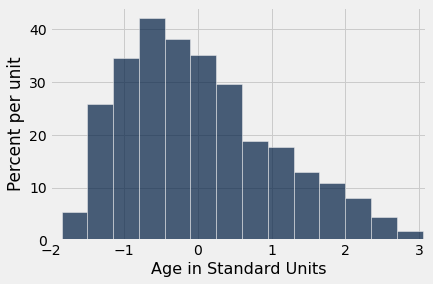

In [44]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)